In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import multiprocessing as mp

In [4]:
lat_list = random.sample([36.5+i*0.1 for i in range(30)], 10) 
lon_list = random.sample([-83+i*0.1 for i in range(80)], 10)

In [5]:
lat_list_df = lat_list*10
lon_list_tem = [[i]*10 for i in lon_list]

In [6]:
lon_list_df = []
for i in range(len(lon_list_tem)):
    lon_list_df += lon_list_tem[i]

In [7]:
df_point = pd.DataFrame({"lat":lat_list_df, "lon":lon_list_df})

In [8]:
gdf_point = gpd.GeoDataFrame(df_point, geometry = gpd.points_from_xy(df_point.lon, df_point.lat, crs = "EPSG:4326"))

<AxesSubplot:>

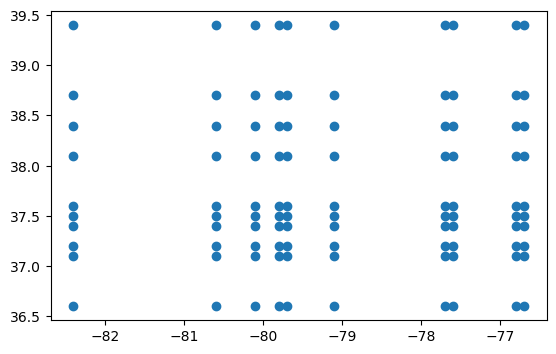

In [9]:
gdf_point.plot()

In [10]:
%time gdf_county = gpd.read_file("./Virginia_City_County_Census_Boundaries/SDE_USDC_CENSUS_VA_COUNTY.shp")

CPU times: total: 156 ms
Wall time: 137 ms


In [11]:
gdf_county.head(2)

,FID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,SHAPE_Leng,SHAPE_Area,geometry
0,1,51,640,01498426,51640,Galax,Galax city,25,C7,G4020,...,None,None,F,21340448.0,103781.0,+36.6656397,-080.9143083,0.323268,3.339356e+07,"POLYGON ((-80.91845 36.68327, -80.91828 36.683..."
1,2,51,760,01789073,51760,Richmond,Richmond city,25,C7,G4020,...,40060,None,F,154894698.0,6880310.0,+37.5313990,-077.4760085,0.869075,2.576779e+08,"POLYGON ((-77.54090 37.57216, -77.54094 37.572..."


In [12]:
gdf_point["idx"] = range(gdf_point.shape[0])

In [13]:
import time
import warnings 
warnings.filterwarnings("ignore")

In [14]:
ts = time.time()
gdf_list = []
for i in range(100):
    gdf_tem = gdf_point[i:i+1]
    gdf_tem["county"] = gpd.sjoin(gdf_tem, gdf_county[["NAMELSAD", "geometry"]], how = "left", op = "intersects").drop_duplicates(subset = ["idx"])["NAMELSAD"]
    gdf_list.append(gdf_tem)
te = time.time()
print(te-ts)

2.1406795978546143


In [15]:
gdf_point_merge = pd.concat(gdf_list)

In [16]:
gdf_point_merge

,lat,lon,geometry,idx,county
0,36.6,-79.8,POINT (-79.80000 36.60000),0,Henry County
1,37.2,-79.8,POINT (-79.80000 37.20000),1,Franklin County
2,39.4,-79.8,POINT (-79.80000 39.40000),2,NaN
3,37.6,-79.8,POINT (-79.80000 37.60000),3,Botetourt County
4,38.4,-79.8,POINT (-79.80000 38.40000),4,NaN
...,...,...,...,...,...
95,37.1,-76.7,POINT (-76.70000 37.10000),95,Surry County
96,38.7,-76.7,POINT (-76.70000 38.70000),96,NaN
97,37.5,-76.7,POINT (-76.70000 37.50000),97,King and Queen County
98,38.1,-76.7,POINT (-76.70000 38.10000),98,Westmoreland County


In [17]:
### point to polygon merge function
def point_match(gdf_tem):
    gdf_tem["county"] = gpd.sjoin(gdf_tem, gdf_county[["NAMELSAD", "geometry"]], how = "left", op = "intersects").drop_duplicates(subset = ["idx"])["NAMELSAD"]
    return gdf_tem

In [ ]:
ts = time.time()
pool = mp.Pool(10)
results = pool.map(point_match, [gdf_point[i:i+1] for i in range(gdf_point.shape[0])])
pool.close()
te = time.time()
print(te-ts)

In [39]:
mp.cpu_count()

20

In [6]:
gdb.columns

Index(['FID', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD',
       'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT',
       'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [5]:
print(gdb.crs)

epsg:4326


In [11]:
gdb

,FID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,SHAPE_Leng,SHAPE_Area,geometry
0,1,51,640,01498426,51640,Galax,Galax city,25,C7,G4020,...,None,None,F,2.134045e+07,1.037810e+05,+36.6656397,-080.9143083,0.323268,3.339356e+07,"POLYGON ((-80.91845 36.68327, -80.91828 36.683..."
1,2,51,760,01789073,51760,Richmond,Richmond city,25,C7,G4020,...,40060,None,F,1.548947e+08,6.880310e+06,+37.5313990,-077.4760085,0.869075,2.576779e+08,"POLYGON ((-77.54090 37.57216, -77.54094 37.572..."
2,3,51,670,01498428,51670,Hopewell,Hopewell city,25,C7,G4020,...,40060,None,F,2.662050e+07,1.357033e+06,+37.2910098,-077.2989443,0.308512,4.428314e+07,"POLYGON ((-77.27031 37.30895, -77.26995 37.308..."
3,4,51,131,01480151,51131,Northampton,Northampton County,06,H1,G4020,...,None,None,A,5.480730e+08,1.511612e+09,+37.3026286,-075.9238683,2.023683,3.260949e+09,"POLYGON ((-76.13586 37.23202, -76.13601 37.250..."
4,5,51,187,01674058,51187,Warren,Warren County,06,H1,G4020,...,47900,47894,A,5.525184e+08,8.483501e+06,+38.9081874,-078.2071314,1.253168,9.278171e+08,"POLYGON ((-78.05925 38.93240, -78.06008 38.932..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,51,197,01501379,51197,Wythe,Wythe County,06,H1,G4020,...,None,None,A,1.196119e+09,7.311856e+06,+36.9014709,-081.0842090,1.637947,1.886215e+09,"POLYGON ((-80.78937 36.93296, -80.78924 36.932..."
130,131,51,027,01497431,51027,Buchanan,Buchanan County,06,H1,G4020,...,None,None,A,1.302149e+09,2.798059e+06,+37.2681198,-082.0381508,2.274797,2.064149e+09,"POLYGON ((-82.15786 37.11023, -82.15789 37.110..."
131,132,51,071,01494551,51071,Giles,Giles County,06,H1,G4020,...,13980,None,A,9.214691e+08,1.201697e+07,+37.3119298,-080.7171778,1.638890,1.478419e+09,"POLYGON ((-80.97784 37.24880, -80.97939 37.250..."
132,133,51,117,01500747,51117,Mecklenburg,Mecklenburg County,06,H1,G4020,...,None,None,A,1.619999e+09,1.391943e+08,+36.6872563,-078.3689592,2.348411,2.740484e+09,"POLYGON ((-78.63061 36.72024, -78.63060 36.720..."


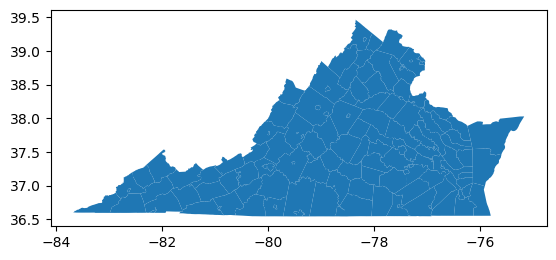

In [14]:
gdb.plot()
plt.show()

In [15]:
len(gdb)

134

In [17]:
gdb.NAME[1]

'Richmond'

In [18]:
for i in range(0, len(gdb)):
    geo = gdb.geometry[i]
    name = gdb.NAME[i]

In [ ]:
tmp_gdb = gdb.to_crs(crs)
new_gdb = gdb1.to_crs(gdb2.crs)